In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Analyze seasonal variation in EASIUR (national) 

In [2]:
national = pd.read_csv('national.csv')

In [3]:
df = national[national['model'] == 'EASIUR'].set_index('season')
total = df.groupby(df.index).sum()
total['pollutant'] = 'total'
df = pd.concat([df, total])

/Users/priyadonti/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



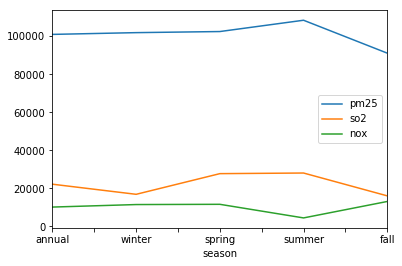

In [4]:
for pollutant in ['pm25', 'so2', 'nox']:
    df[df['pollutant'] == pollutant]['damage'].plot(label=pollutant)
plt.legend()

In [5]:
pollutant = 'pm25'
df[df['pollutant'] == pollutant]['damage'] / df[df['pollutant'] == pollutant].loc['annual', 'damage']

season
annual    1.000000
winter    1.009123
spring    1.014841
summer    1.073681
fall      0.902355
Name: damage, dtype: float64

In [6]:
pollutant = 'nox'
df[df['pollutant'] == pollutant]['damage'] / df[df['pollutant'] == pollutant].loc['annual', 'damage']

season
annual    1.000000
winter    1.129854
spring    1.142350
summer    0.438972
fall      1.288825
Name: damage, dtype: float64

In [7]:
pollutant = 'so2'
df[df['pollutant'] == pollutant]['damage'] / df[df['pollutant'] == pollutant].loc['annual', 'damage']

season
annual    1.000000
winter    0.760592
spring    1.250337
summer    1.264979
fall      0.724092
Name: damage, dtype: float64

In [8]:
df_summary1 = \
    pd.concat([df[df['pollutant'] == pollutant]['damage'] / df[df['pollutant'] == pollutant].loc['annual', 'damage']
           for pollutant in ['so2', 'nox', 'pm25']], axis=1).drop('annual')
df_summary1 = (df_summary1 * 100).astype(int)
df_summary1.columns = ['\so', '\\nox', '\partic']
df_summary1

,\so,\nox,\partic
season,,,
winter,76,112,100
spring,125,114,101
summer,126,43,107
fall,72,128,90


In [9]:
print(df_summary1.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  \textbackslash so &  \textbackslash nox &  \textbackslash partic \\
season &      &       &          \\
\midrule
winter &   76 &   112 &      100 \\
spring &  125 &   114 &      101 \\
summer &  126 &    43 &      107 \\
fall   &   72 &   128 &       90 \\
\bottomrule
\end{tabular}



### Analyze seasonal variation in EASIUR (PJM)  

In [10]:
pjm = pd.read_csv('pjm_states.csv')
pjm = pjm.groupby(['pollutant', 'model', 'season', 'elevated']).mean().drop('fips', axis=1).reset_index() # states

In [11]:
df = pjm[pjm['model'] == 'EASIUR'].set_index('season')
total = df.groupby(df.index).sum()
total['pollutant'] = 'total'
df = pd.concat([df, total])

/Users/priyadonti/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



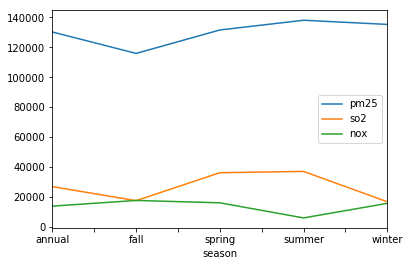

In [12]:
for pollutant in ['pm25', 'so2', 'nox']:
    df[df['pollutant'] == pollutant]['damage'].plot(label=pollutant)
plt.legend()

In [13]:
pollutant = 'pm25'
df[df['pollutant'] == pollutant]['damage'] / df[df['pollutant'] == pollutant].loc['annual', 'damage']

season
annual    1.000000
fall      0.890093
spring    1.010408
summer    1.060458
winter    1.039040
Name: damage, dtype: float64

In [14]:
pollutant = 'nox'
df[df['pollutant'] == pollutant]['damage'] / df[df['pollutant'] == pollutant].loc['annual', 'damage']

season
annual    1.000000
fall      1.276576
spring    1.160923
summer    0.427730
winter    1.134772
Name: damage, dtype: float64

In [15]:
pollutant = 'so2'
df[df['pollutant'] == pollutant]['damage'] / df[df['pollutant'] == pollutant].loc['annual', 'damage']

season
annual    1.000000
fall      0.650097
spring    1.347286
summer    1.379642
winter    0.622975
Name: damage, dtype: float64

In [16]:
df_summary2 = \
    pd.concat([df[df['pollutant'] == pollutant]['damage'] / df[df['pollutant'] == pollutant].loc['annual', 'damage']
           for pollutant in ['so2', 'nox', 'pm25']], axis=1).drop('annual')
df_summary2 = (df_summary2 * 100).astype(int)
df_summary2.columns = ['\so', '\\nox', '\partic']
df_summary2

,\so,\nox,\partic
season,,,
fall,65,127,89
spring,134,116,101
summer,137,42,106
winter,62,113,103


In [17]:
print(df_summary2.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  \textbackslash so &  \textbackslash nox &  \textbackslash partic \\
season &      &       &          \\
\midrule
fall   &   65 &   127 &       89 \\
spring &  134 &   116 &      101 \\
summer &  137 &    42 &      106 \\
winter &   62 &   113 &      103 \\
\bottomrule
\end{tabular}

